Importing the libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from sklearn.metrics import classification_report, confusion_matrix
import itertools

2023-12-10 16:54:21.648255: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
IMAGE_SIZE = 180
CHANNELS = 3
img_height,img_width=180,180
batch_size=32
data_dir = '/Users/nareshkalluri/Downloads/DS/'

Data Augmentation

In [ ]:
# data_dir = '/Users/nareshkalluri/Downloads/PlantVillage/'

# # Specify the target directory to store the augmented images locally
# target_directory = '/Users/nareshkalluri/Downloads/Aug_PlantVillage'

# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir,
#     seed=123,
#     label_mode='categorical',
#     image_size=(img_height, img_width),
#     batch_size=batch_size
# )

# # Get class names
# class_names = train_ds.class_names

# # Initialize a dictionary to store class-wise counts and original images
# class_counts = {class_name: 0 for class_name in class_names}
# stored_images = {class_name: [] for class_name in class_names}

# for images, labels in train_ds:
#     for i in range(len(images)):
#         label = labels[i]
#         class_index = tf.argmax(label).numpy()
#         class_name = class_names[class_index]

#         # Store the original images for each class
#         stored_images[class_name].append(images[i].numpy())
#         class_counts[class_name] += 1

# # Verify the class-wise distribution
# for class_name, count in class_counts.items():
#     print(f'{class_name}: {count} samples')


# # Define the desired minimum count for each class
# min_count_per_class = 1000

# # Perform data augmentation for classes with fewer than min_count_per_class samples
# data_augmentation = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Create a new dataset for augmented data
# augmented_data = []

# for class_name in class_names:
#     class_index = class_names.index(class_name)
#     label_count = class_counts[class_name]
#     print(f'Label: {class_name}, Image Count: {label_count}')

#     if label_count < min_count_per_class:
#         stored_image_count = len(stored_images[class_name])
#         img_dir = os.path.join(target_directory, class_name)

#         while class_counts[class_name] < min_count_per_class:
#             # Randomly select an image from the stored images for this class
#             random_image_index = np.random.randint(0, stored_image_count)
#             augmented_image = data_augmentation.random_transform(stored_images[class_name][random_image_index])
#             augmented_data.append((augmented_image, label))
#             class_counts[class_name] += 1

#             # Save the augmented image to the local folder
#             os.makedirs(img_dir, exist_ok=True)
#             image_filename = f'{class_name}_{class_counts[class_name]}.jpg'
#             image_path = os.path.join(img_dir, image_filename)
#             save_img(image_path, augmented_image)

# # Convert augmented_data to a TensorFlow dataset
# augmented_ds = tf.data.Dataset.from_generator(
#     lambda: augmented_data,
#     output_signature=(
#         tf.TensorSpec(shape=(img_height, img_width, 3), dtype=tf.float32),
#         tf.TensorSpec(shape=(len(class_names),), dtype=tf.float32)
#     )
# )

# # Concatenate the original dataset and the augmented dataset
# combined_ds = train_ds.concatenate(augmented_ds)

# # Verify the class-wise distribution
# for class_name, count in class_counts.items():
#     print(f'{class_name}: {count} samples')


Data Splitting

In [ ]:
# import splitfolders

# data_dir = '/Users/nareshkalluri/Downloads/Aug_PlantVillage'
# splitfolders.ratio(data_dir, seed=1337, output="Dataset", ratio=(0.8, 0.1, 0.1))


Data Loading

In [ ]:
aug_ds = tf.keras.preprocessing.image_dataset_from_directory(
        '/Users/nareshkalluri/Downloads/Aug_PlantVillage',
        seed=123,
        label_mode = 'categorical',
        image_size=(img_height, img_width),
        batch_size=batch_size)

Found 22164 files belonging to 15 classes.


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir + 'train/',
        seed=123,
        label_mode = 'categorical',
        image_size=(img_height, img_width),
        batch_size=batch_size)

Found 17727 files belonging to 15 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir + 'val/',
        seed=123,
        label_mode = 'categorical',
        image_size=(img_height, img_width),
        batch_size=batch_size)

Found 2212 files belonging to 15 classes.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir + 'test/',
        seed=123,
        label_mode = 'categorical',
        image_size=(img_height, img_width),
        batch_size=batch_size)

Found 2225 files belonging to 15 classes.


Checking Labels and Training Data

In [ ]:
class_names = train_ds.class_names

# Initialize a dictionary to store class-wise counts and original images
class_counts = {class_name: 0 for class_name in class_names}
stored_images = {class_name: [] for class_name in class_names}

for images, labels in train_ds:
    for i in range(len(images)):
        label = labels[i]
        class_index = tf.argmax(label).numpy()
        class_name = class_names[class_index]

        # Store the original images for each class
        stored_images[class_name].append(images[i].numpy())
        class_counts[class_name] += 1

# Verify the class-wise distribution
for class_name, count in class_counts.items():
    print(f'{class_name}: {count} samples')

Pepper__bell___Bacterial_spot: 800 samples
Pepper__bell___healthy: 1182 samples
Potato___Early_blight: 800 samples
Potato___Late_blight: 800 samples
Potato___healthy: 800 samples
Tomato_Bacterial_spot: 1701 samples
Tomato_Early_blight: 800 samples
Tomato_Late_blight: 1527 samples
Tomato_Leaf_Mold: 800 samples
Tomato_Septoria_leaf_spot: 1416 samples
Tomato_Spider_mites_Two_spotted_spider_mite: 1340 samples
Tomato__Target_Spot: 1123 samples
Tomato__Tomato_YellowLeaf__Curl_Virus: 2566 samples
Tomato__Tomato_mosaic_virus: 800 samples
Tomato_healthy: 1272 samples


Class Distribution of the Data

In [ ]:
def temp_ds(train_ds):
    class_counts = {class_name: 0 for class_name in train_ds.class_names}

    # Count the number of images for each class
    for images, labels in train_ds:
        for label in labels.numpy():
            class_name = train_ds.class_names[tf.argmax(label)]
            class_counts[class_name] += 1

    # Create a bar graph for class distribution with rotated x-axis labels
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(class_counts.keys(), class_counts.values())

    # Rotate x-axis labels for better alignment
    plt.xticks(rotation=45, ha="right", fontsize=8)  # Adjust fontsize as needed

    # Add counts on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval), ha='center', va='bottom')

    # Add labels and title
    ax.set_xlabel('Class Names')
    ax.set_ylabel('Number of Images')
    ax.set_title('Class Distribution in the Dataset')

    # Adjust layout to prevent clipping of labels
    plt.tight_layout()

    plt.show()

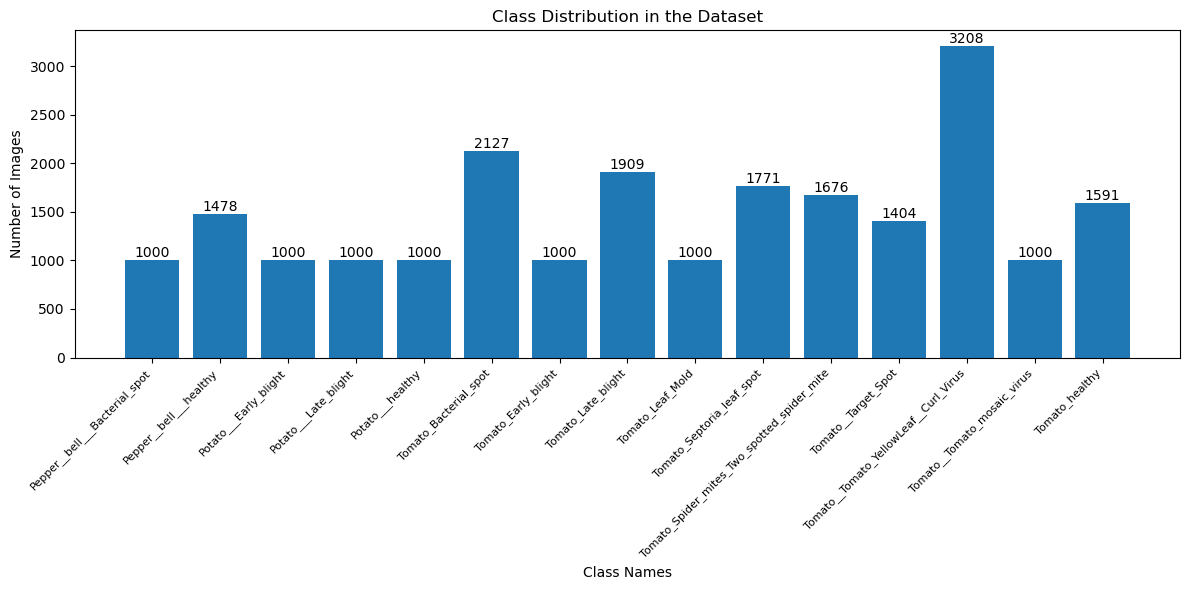

In [ ]:
temp_ds(aug_ds)

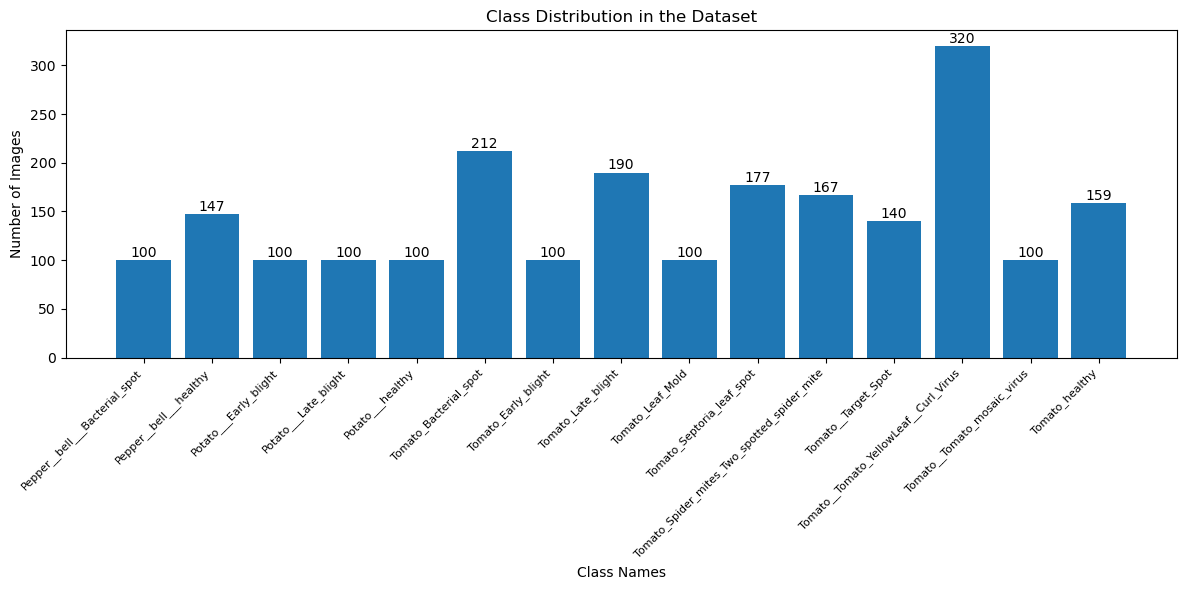

In [ ]:
temp_ds(val_ds)

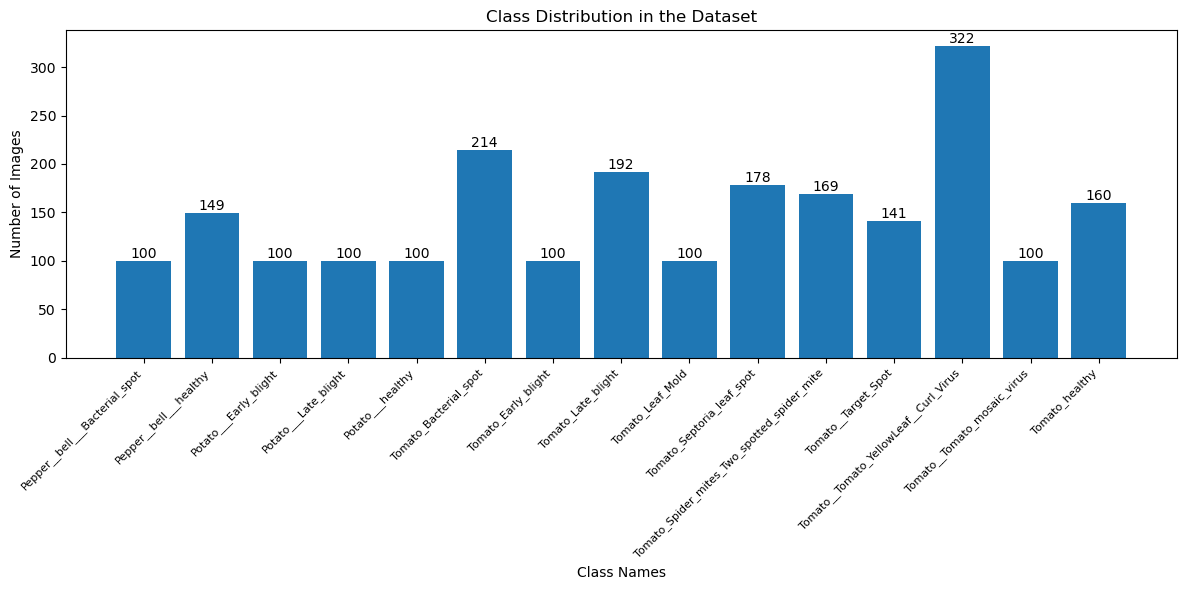

In [ ]:
temp_ds(test_ds)

Building a Model

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=15,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(15, activation='softmax'))


In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 24644495 (94.01 MB)
Trainable params: 1056783 (4.03 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
resnet_model.compile(optimizer='adam',loss='categorical_crossentropy',
                     metrics=['accuracy'])

Training the Model

In [ ]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
554/554 [==============================] - 1190s 2s/step - loss: 0.4152 - accuracy: 0.8644 - val_loss: 0.3024 - val_accuracy: 0.8951
Epoch 2/10
554/554 [==============================] - 1224s 2s/step - loss: 0.1644 - accuracy: 0.9425 - val_loss: 0.1558 - val_accuracy: 0.9494
Epoch 3/10
554/554 [==============================] - 1230s 2s/step - loss: 0.1177 - accuracy: 0.9591 - val_loss: 0.1875 - val_accuracy: 0.9417
Epoch 4/10
554/554 [==============================] - 1238s 2s/step - loss: 0.0908 - accuracy: 0.9673 - val_loss: 0.1662 - val_accuracy: 0.9467
Epoch 5/10
554/554 [==============================] - 1221s 2s/step - loss: 0.0723 - accuracy: 0.9738 - val_loss: 0.1748 - val_accuracy: 0.9439
Epoch 6/10
554/554 [==============================] - 1208s 2s/step - loss: 0.0565 - accuracy: 0.9805 - val_loss: 0.1674 - val_accuracy: 0.9480
Epoch 7/10
554/554 [==============================] - 1166s 2s/step - loss: 0.0583 - accuracy: 0.9793 - val_loss: 0.2180 - val_accuracy:

Testing Model on Augmented Test Data

In [ ]:
scores = resnet_model.evaluate(test_ds)

70/70 [==============================] - 117s 2s/step - loss: 0.1755 - accuracy: 0.9604


Loading Original Test Data Set

In [ ]:
# Loading Original Test Data(without Augmentation)
test_data_dir = '/Users/nareshkalluri/Downloads/Dataset/test'

Prev_test_ds = tf.keras.preprocessing.image_dataset_from_directory(
        test_data_dir,
        seed=123,
        label_mode = 'categorical',
        image_size=(img_height, img_width),
        batch_size=batch_size)

Found 2076 files belonging to 15 classes.


Testing on Original Test Data

In [ ]:
scores_prev = resnet_model.evaluate(Prev_test_ds)

65/65 [==============================] - 122s 2s/step - loss: 0.1806 - accuracy: 0.9595


Evaluation

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

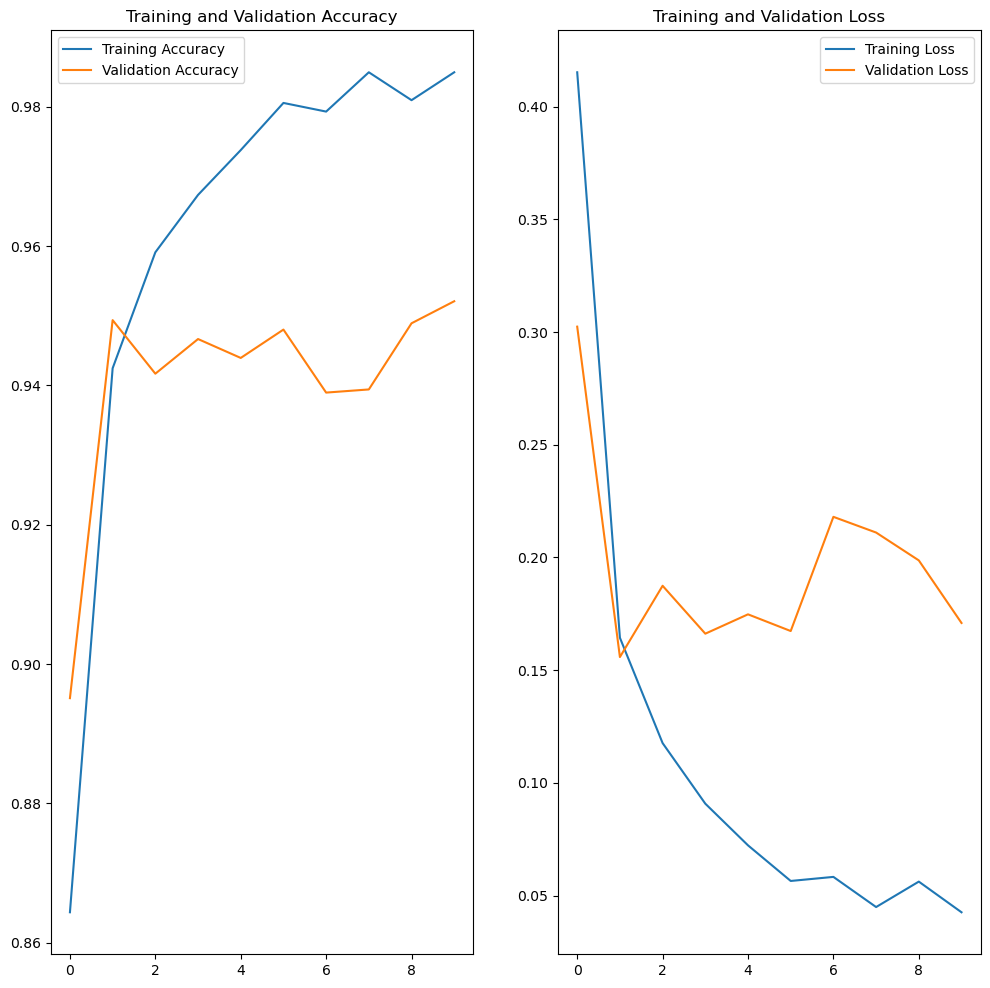

In [ ]:
EPOCHS = 10

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
tlabels= []
plabels = []

for image_batch, label_batch in test_ds:
    for i in range(0, len(image_batch)):
        first_image = image_batch[i].numpy().astype('uint8')
        print("actual label:", class_names[np.argmax(label_batch[i])])
        tlabels.append(np.argmax(label_batch[i]))
        batch_prediction = resnet_model.predict(image_batch)
        print("predicted label:", class_names[np.argmax(batch_prediction[i])])
        plabels.append(np.argmax(batch_prediction[i]))


actual label: Tomato_Bacterial_spot
1/1 [==============================] - 3s 3s/step
predicted label: Tomato_Bacterial_spot
actual label: Tomato__Tomato_YellowLeaf__Curl_Virus
1/1 [==============================] - 2s 2s/step
predicted label: Tomato__Tomato_YellowLeaf__Curl_Virus
actual label: Tomato__Tomato_YellowLeaf__Curl_Virus
1/1 [==============================] - 2s 2s/step
predicted label: Tomato__Tomato_YellowLeaf__Curl_Virus
actual label: Tomato__Tomato_YellowLeaf__Curl_Virus
1/1 [==============================] - 2s 2s/step
predicted label: Tomato__Tomato_YellowLeaf__Curl_Virus
actual label: Tomato_Septoria_leaf_spot
1/1 [==============================] - 2s 2s/step
predicted label: Tomato_Septoria_leaf_spot
actual label: Pepper__bell___Bacterial_spot
1/1 [==============================] - 2s 2s/step
predicted label: Pepper__bell___Bacterial_spot
actual label: Tomato_Septoria_leaf_spot
1/1 [==============================] - 2s 2s/step
predicted label: Tomato__Target_Spot
act

Confusion Matrix
Normalized confusion matrix
Classification Report
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.99      0.96      0.97       100
                     Pepper__bell___healthy       0.98      0.99      0.99       149
                      Potato___Early_blight       0.95      1.00      0.98       100
                       Potato___Late_blight       0.93      0.95      0.94       100
                           Potato___healthy       0.96      1.00      0.98       100
                      Tomato_Bacterial_spot       1.00      0.98      0.99       214
                        Tomato_Early_blight       0.93      0.89      0.91       100
                         Tomato_Late_blight       0.98      0.94      0.96       192
                           Tomato_Leaf_Mold       0.96      0.97      0.97       100
                  Tomato_Septoria_leaf_spot       0.98      0.91      0.94       1

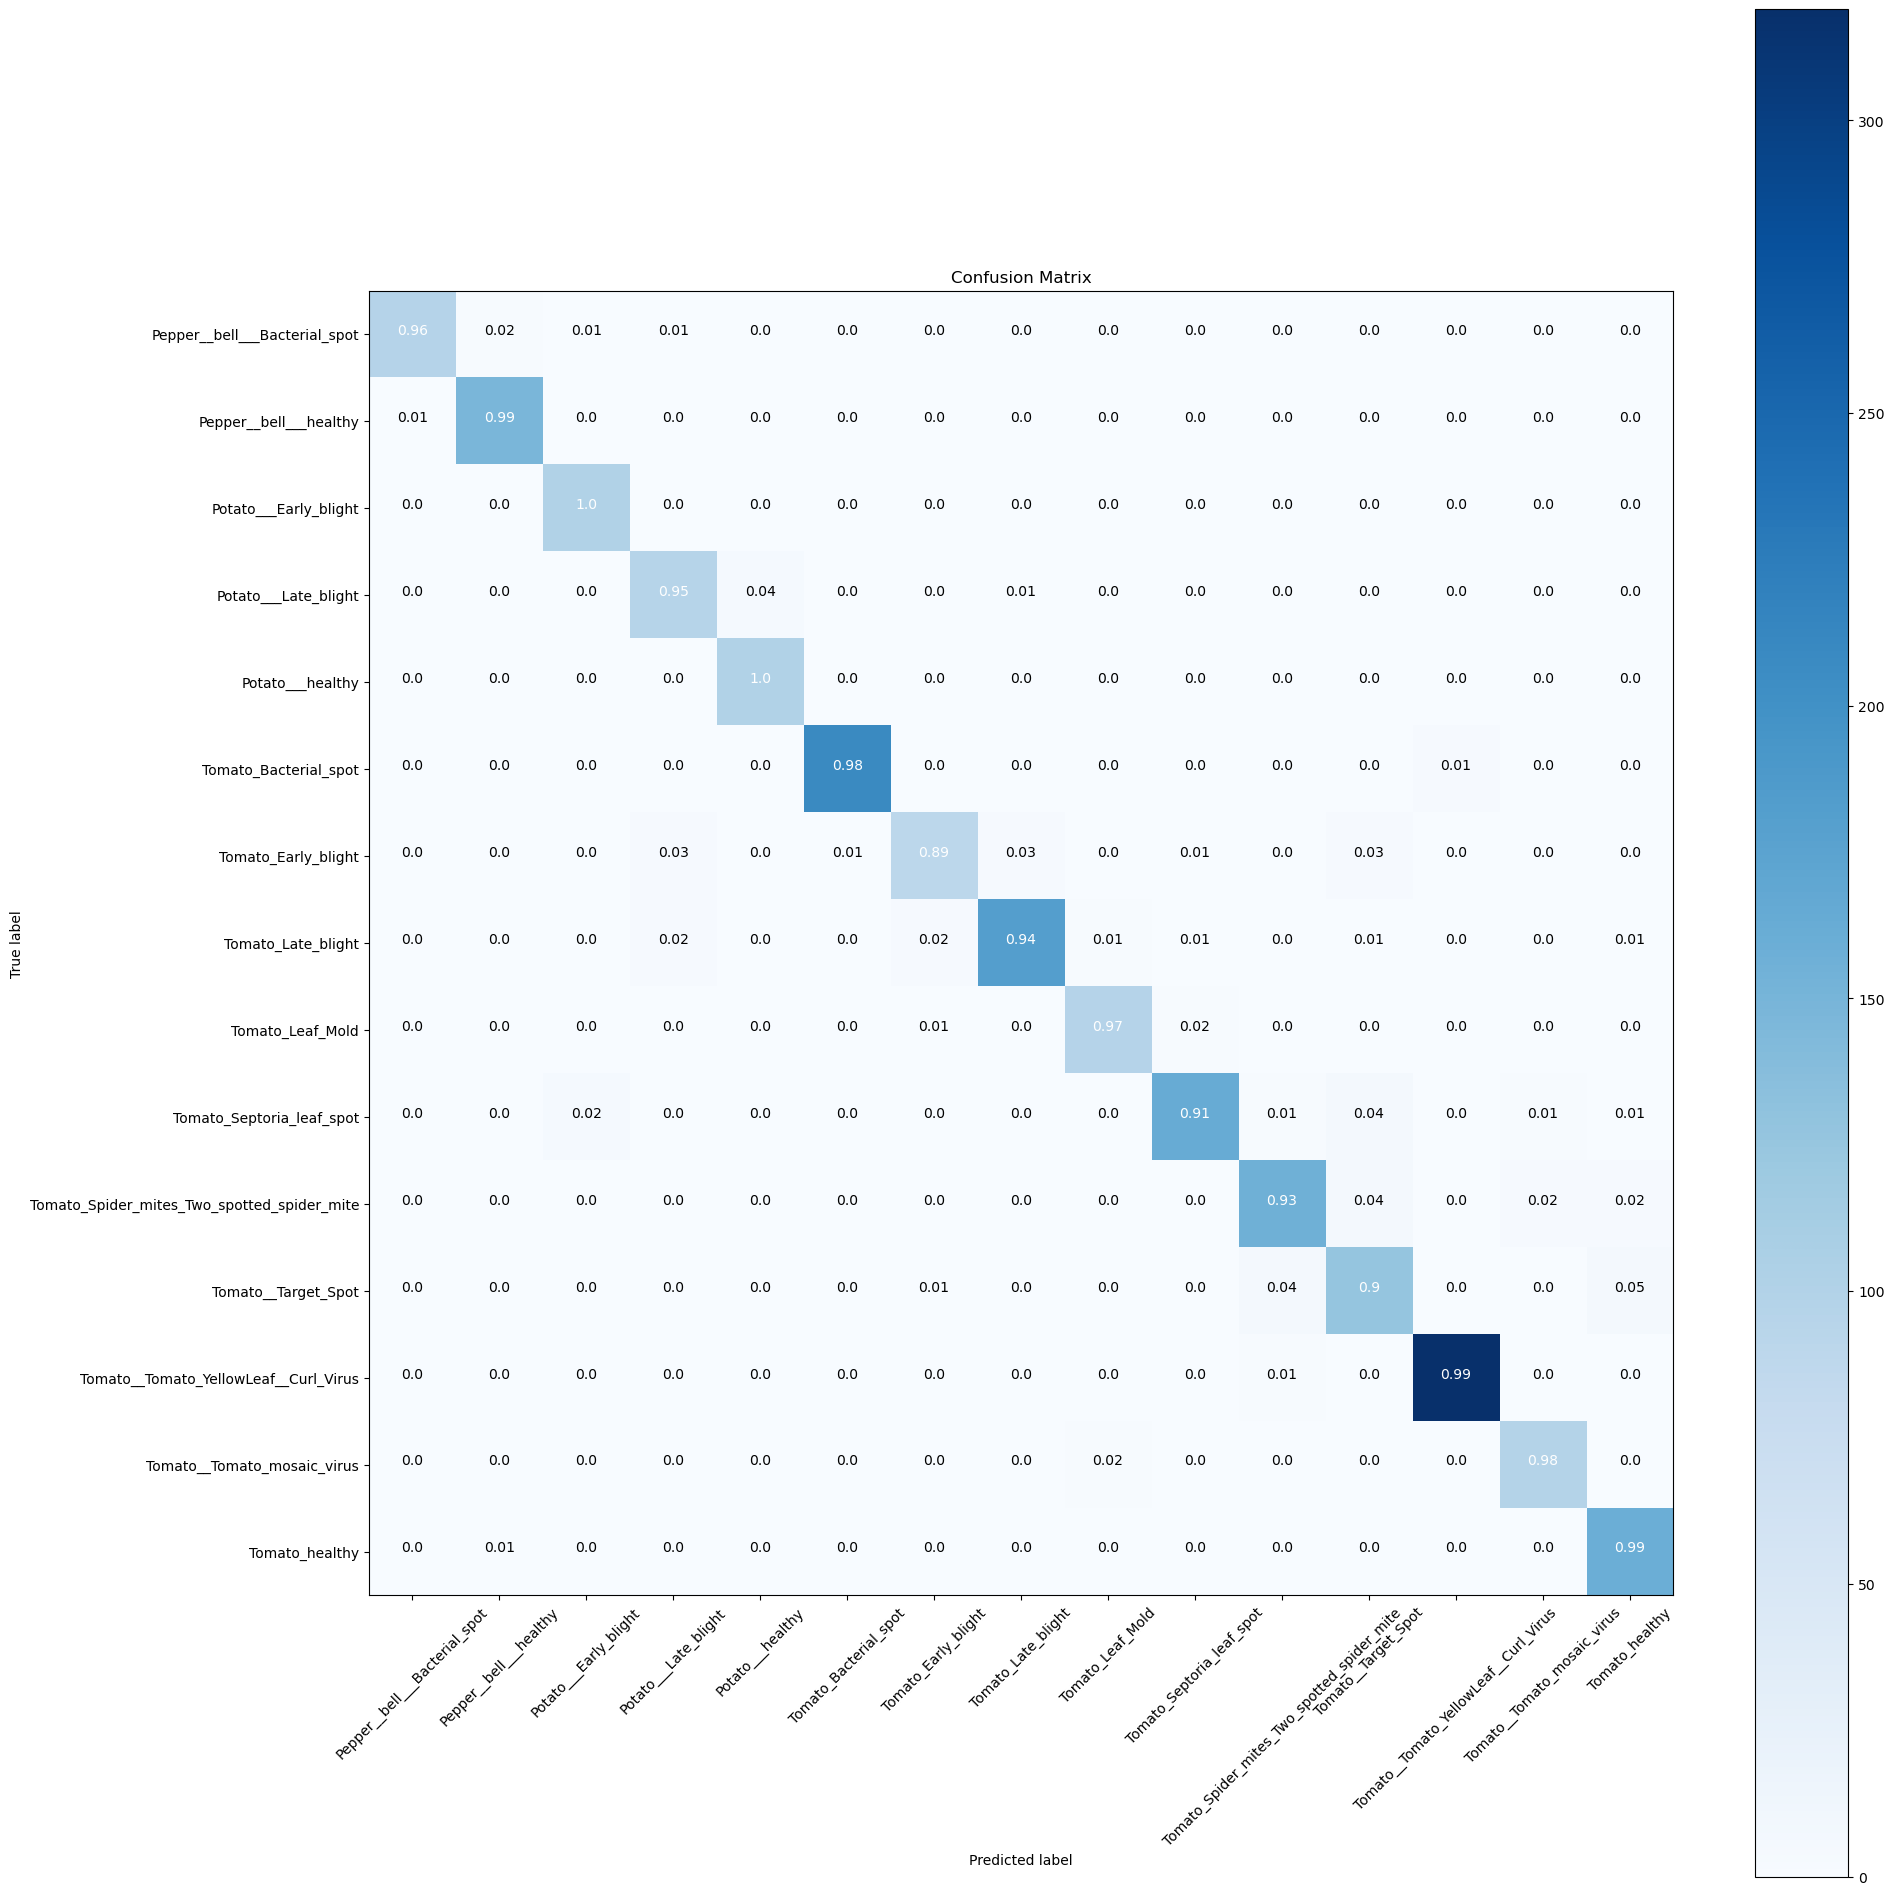

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


#Confution Matrix
print('Confusion Matrix')
cm = confusion_matrix(tlabels, plabels)
plot_confusion_matrix(cm, class_names, title='Confusion Matrix')
print('Classification Report')
print(classification_report(tlabels, plabels, target_names=class_names))

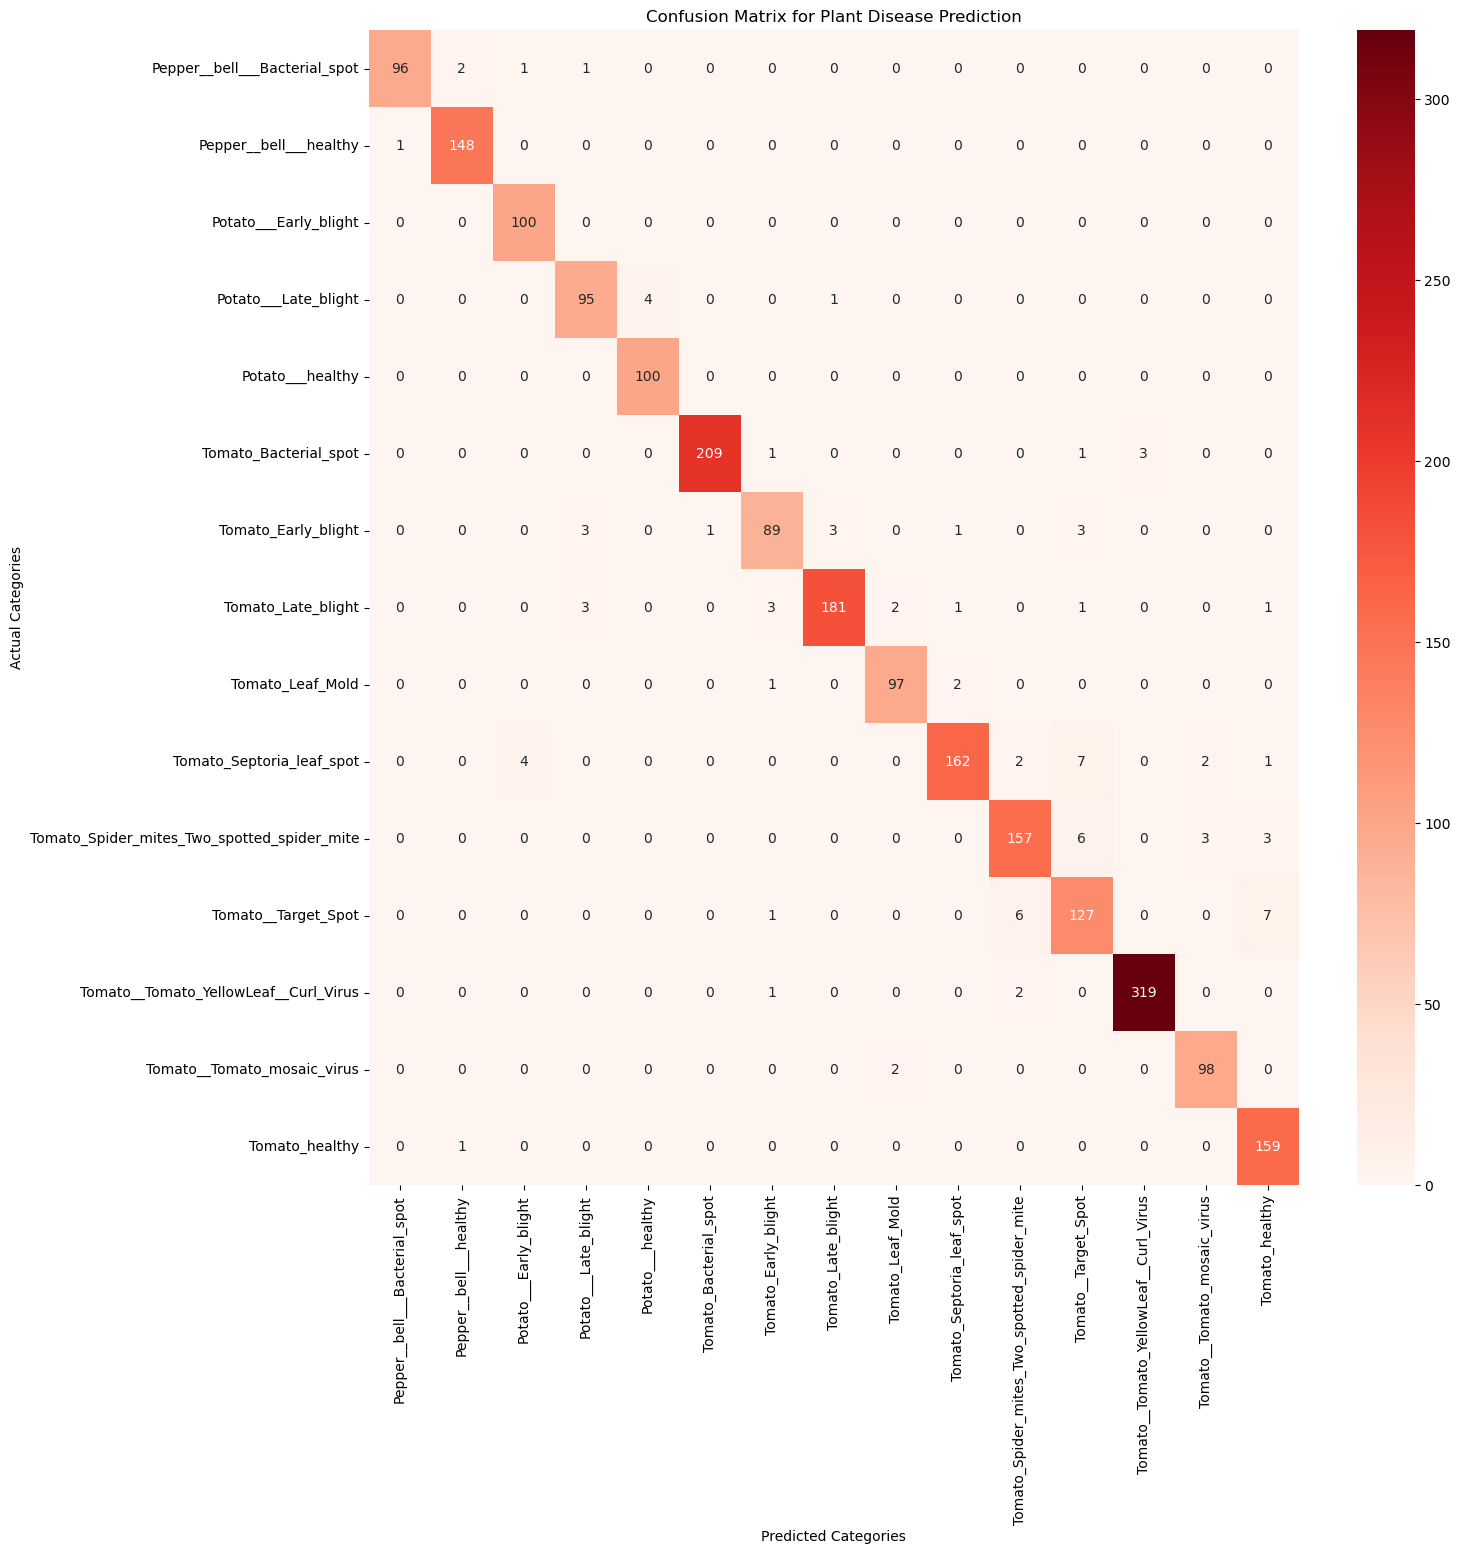

In [ ]:
import seaborn as sns

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=class_names, yticklabels=class_names)

# Labeling the x and y axes
plt.xlabel('Predicted Categories')
plt.ylabel('Actual Categories')

# Setting the title for the heatmap
plt.title('Confusion Matrix for Plant Disease Prediction')

# Display the heatmap
plt.show()

In [ ]:
true_cat = tf.concat([y for x,y in test_ds], axis=0)
test_data = tf.concat([x for x,y in test_ds], axis=0)

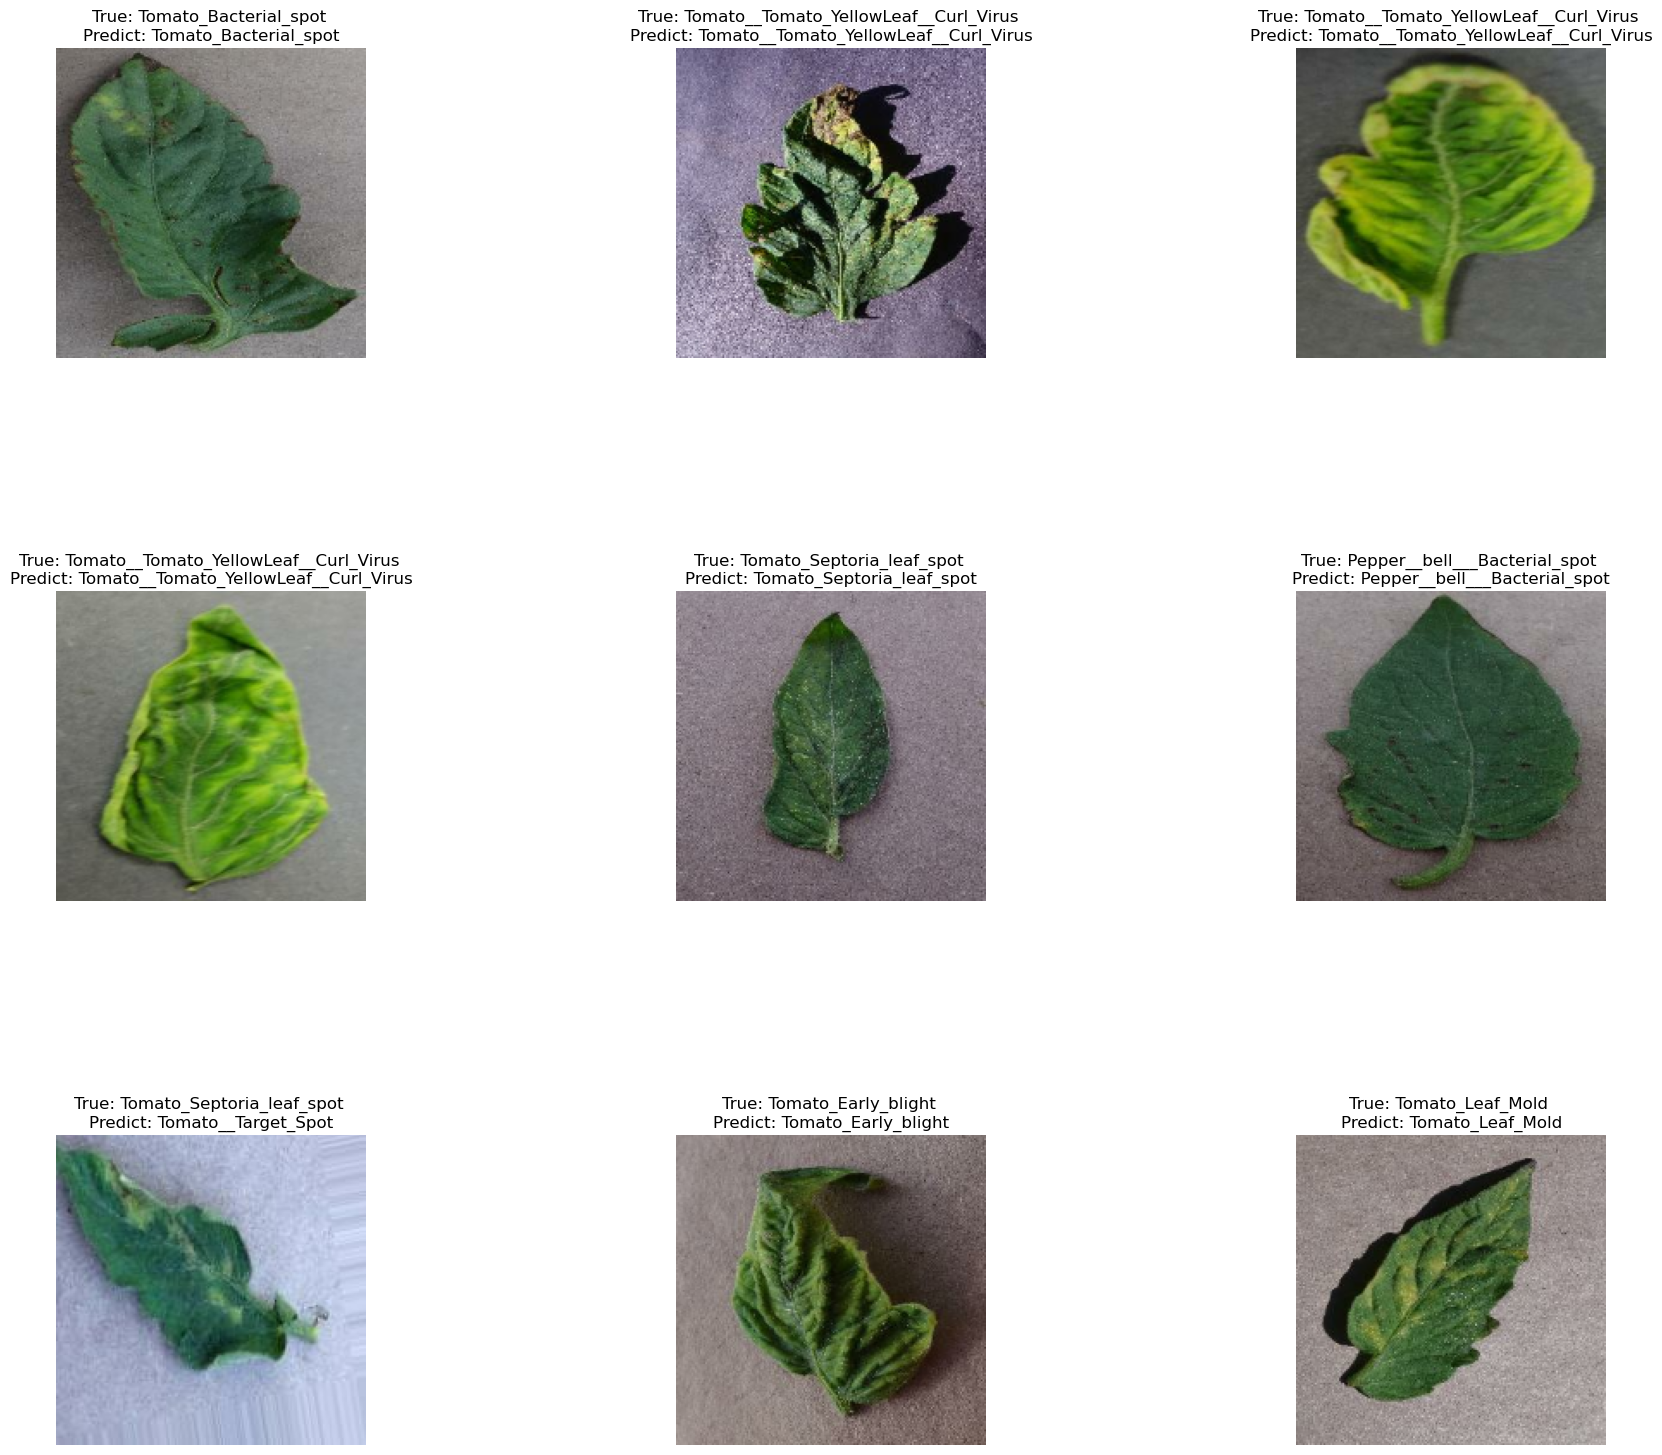

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20,20))
axes = axes.ravel()
for i in np.arange(0, 9):
    axes[i].imshow(test_data[i].numpy().astype('uint8'))
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[tlabels[i]], class_names[plabels[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)


In [ ]:
resnet_model.save("/Users/nareshkalluri/Downloads/archive/Augplantdisease.h5")

/Users/nareshkalluri/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
resnet_model.save_weights("Aug_model_wts.h5")